In [ ]:
#import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [ ]:
# read csv
df = pd.read_csv('XRP-USD.csv')
df = df[['Date', 'Close']]
df

,Date,Close
0,2018-06-15,0.537707
1,2018-06-16,0.534784
2,2018-06-17,0.528216
3,2018-06-18,0.537495
4,2018-06-19,0.549621
...,...,...
1822,2023-06-11,0.521221
1823,2023-06-12,0.525721
1824,2023-06-13,0.520086
1825,2023-06-14,0.480220


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
df['days'] = (df['Date'] - df['Date'].iloc[0]).dt.days

In [ ]:
# 4. Chia train test
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Chia dữ liệu thành features và labels
X = df['days'].values.reshape(-1, 1)
y = df['Close'].values

In [ ]:
# kernel và GPR model
kernel = C(1.0, (1e-2, 1e2)) * RBF(10, (1e-1, 1e1))
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
model.fit(X, y)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10)

In [ ]:
# Dự đoán kết quả với dữ liệu test
x_test = np.linspace(0, test_data['days'].iloc[-1], len(test_data['days'])).reshape(-1, 1)
y_pred_test, sigma = model.predict(x_test, return_std=True)

In [ ]:
# Dự đoán kết quả với dữ liệu validate
x_val = np.linspace(0, val_data['days'].iloc[-1], len(val_data['days'])).reshape(-1, 1)
y_pred_val, sigma = model.predict(x_val, return_std=True)

In [ ]:
# Tạo dữ liệu đầu vào cho 30 ngày tiếp theo
future_days = np.arange(df['days'].max() + 1, df['days'].max() + 31).reshape(-1, 1)

# Dự đoán giá xăng trong 30 ngày tiếp theo
y_future, sigma = model.predict(future_days, return_std=True)

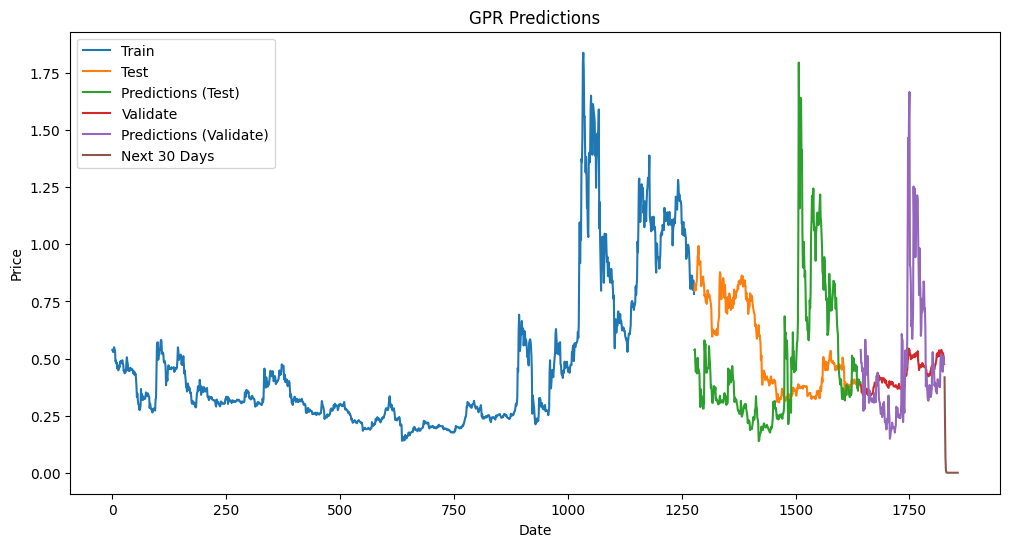

In [ ]:
# Vẽ biểu đồ đường thể hiện train, test, dự đoán trên tập test, validate và giá dự đoán 30 ngày tiếp theo
plt.figure(figsize=(12, 6))

plt.plot(train_data['days'], train_data['Close'])
plt.plot(test_data['days'], test_data['Close'])
plt.plot(test_data['days'], y_pred_test)
plt.plot(val_data['days'], val_data['Close'])
plt.plot(val_data['days'], y_pred_val)
plt.plot(future_days, y_future)
plt.legend(['Train', 'Test', 'Predictions (Test)', 'Validate', 'Predictions (Validate)', 'Next 30 Days'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GPR Predictions')
plt.show()

In [ ]:
# Tạo dữ liệu đầu vào cho 30 ngày tiếp theo
future_days = np.arange(df['days'].max() + 1, df['days'].max() + 31).reshape(-1, 1)

# Dự đoán giá xăng trong 30 ngày tiếp theo
y_pred, sigma = model.predict(future_days, return_std=True)

# In ra dự đoán giá xăng trong 30 ngày tiếp theo
print("Dự đoán giá xăng trong 30 ngày tiếp theo:")
for day, price in zip(future_days.flatten(), y_pred):
    print(f"Ngày {day}: {price}")

Dự đoán giá xăng trong 30 ngày tiếp theo:
Ngày 1827: 0.4180000577990811
Ngày 1828: 0.22646610751628662
Ngày 1829: 0.06831418864479649
Ngày 1830: 0.011494522657499147
Ngày 1831: 0.0010963234112249304
Ngày 1832: 6.003909588916773e-05
Ngày 1833: 1.9037720146107472e-06
Ngày 1834: 3.513289888083512e-08
Ngày 1835: 3.7850371935441667e-10
Ngày 1836: 2.3849416364693106e-12
Ngày 1837: 8.798437850104688e-15
Ngày 1838: 1.901645120090111e-17
Ngày 1839: 2.4088600527199543e-20
Ngày 1840: 1.788739224912807e-23
Ngày 1841: 7.787386015392501e-27
Ngày 1842: 1.9878259120490605e-30
Ngày 1843: 2.975268606558049e-34
Ngày 1844: 2.6112380728781645e-38
Ngày 1845: 1.3438346182994963e-42
Ngày 1846: 4.055347938636501e-47
Ngày 1847: 7.176218151410922e-52
Ngày 1848: 7.446457071598318e-57
Ngày 1849: 4.530968846857987e-62
Ngày 1850: 1.6166657910812776e-67
Ngày 1851: 3.382497438855958e-73
Ngày 1852: 4.149950504601458e-79
Ngày 1853: 2.985634653507594e-85
Ngày 1854: 1.2595597326856472e-91
Ngày 1855: 3.1159412778188406e-98

In [ ]:
#Tính độ chính xác validate, test
y_test = np.array(test_data['Close'])
y_val = np.array(val_data['Close'])
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 0.26121716136048506
Testing RMSE: 0.41488269821367235
